In [7]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [4]:
# Ex1 What is the normal body temperature for healthy humans?
n = 130
xbar = 98.25
s = 0.73
sem = s / np.sqrt(n)

In [5]:
stats.t.interval(confidence=0.99, df=n-1, loc=xbar, scale=sem)

(98.08260738705933, 98.41739261294067)

In [6]:
# Ex2 the average number of days required for inpatient treatment of patients 
n = 500
xbar = 5.4
s = 3.1
sem = s / np.sqrt(n)

In [7]:
stats.t.interval(confidence=0.99, df=n-1, loc=xbar, scale=sem)

(5.041525888376247, 5.7584741116237534)

In [8]:
#Ex3
mu = 13.20
xbar = 12.20
n = 40
sigma = 2.5
alpha = 0.01
z = (xbar - mu) / (sigma/np.sqrt(n))
z

-2.5298221281347035

In [9]:
p_value = stats.norm.cdf(z)
p_value

0.005706018193000826

In [9]:
#Ex4
soil = pd.read_csv("soil.csv")
soil

,Soil1,Soil2
0,1.442,1.364
1,1.943,1.878
2,1.110,1.337
3,1.912,1.828
4,1.553,1.371
5,1.641,1.428
6,1.499,1.119
7,1.347,1.373
8,1.685,1.589
9,1.578,1.714


In [10]:
soil.Soil1.mean()

1.6918

In [11]:
soil = soil.fillna(soil.Soil1.mean())
soil

,Soil1,Soil2
0,1.4420,1.364
1,1.9430,1.878
2,1.1100,1.337
3,1.9120,1.828
4,1.5530,1.371
5,1.6410,1.428
6,1.4990,1.119
7,1.3470,1.373
8,1.6850,1.589
9,1.5780,1.714


In [12]:
leveneTest = stats.levene(soil.Soil1, soil.Soil2)
leveneTest

LeveneResult(statistic=1.6612825488884275, pvalue=0.20179788672995813)

In [13]:
indTest = stats.ttest_ind(soil.Soil1, soil.Soil2, equal_var = True)
indTest

Ttest_indResult(statistic=5.58856260809653, pvalue=4.381657766244157e-07)

In [15]:
#Ex5

pisa = pd.read_csv("2015 PISA Test.csv")
pisa

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
0,ALB,EU,63.252933,413.1570,405.2588,427.2250
1,ARE,AS,90.500000,427.4827,433.5423,436.7311
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
3,AUS,OC,84.560519,493.8962,502.9006,509.9939
4,AUT,EU,83.940142,496.7423,484.8656,495.0375
...,...,...,...,...,...,...
65,TUN,AF,48.519836,366.8180,361.0555,386.4034
66,TUR,EU,53.744979,420.4540,428.3351,425.4895
67,URY,SA,64.600000,417.9919,436.5721,435.3630
68,USA,NaN,74.554202,469.6285,496.9351,496.2424


In [16]:
pisa.Continent_Code.unique()

array(['EU', 'AS', 'SA', 'OC', nan, 'AF'], dtype=object)

In [23]:
pisa.replace(np.nan, "NA", inplace=True)
pisa.sample(5)

,Country Code,Continent_Code,internet_users_per_100,Math,Reading,Science
19,DZA,AF,38.200000,359.6062,349.8593,375.7451
2,ARG,SA,68.043064,409.0333,425.3031,432.2262
17,DNK,EU,96.330500,511.0876,499.8146,501.9369
16,DEU,EU,87.589800,505.9713,509.1041,509.1406
31,IRL,EU,80.122400,503.7220,520.8148,502.5751


In [24]:
pisa[pisa.Continent_Code == "EU"].describe()
pisa[pisa.Continent_Code == "SA"].describe()
pisa[pisa.Continent_Code == "AF"].describe()
pisa[pisa.Continent_Code == "OC"].describe()
pisa[pisa.Continent_Code == "NA"].describe()

,internet_users_per_100,Math,Reading,Science
count,37.000000,37.000000,37.000000,37.000000
mean,77.274888,477.981449,476.164608,478.299381
std,12.425773,35.150403,37.720545,34.450616
min,53.744979,371.311400,351.741500,383.682400
25%,68.632900,464.040100,452.514300,460.774900
50%,76.184000,489.728700,487.250100,490.225000
75%,87.479056,503.722000,499.814600,501.936900
max,98.200000,521.250600,526.424700,534.193700


In [25]:
pisa[pisa.Continent_Code == "EU"]["Math"].mean()

477.98144864864867

In [26]:
indTest = stats.ttest_ind(pisa[pisa.Continent_Code == "EU"]["Math"], pisa[pisa.Continent_Code == "AS"]["Math"], equal_var = True)
indTest

Ttest_indResult(statistic=0.870055317967983, pvalue=0.38826888111307345)

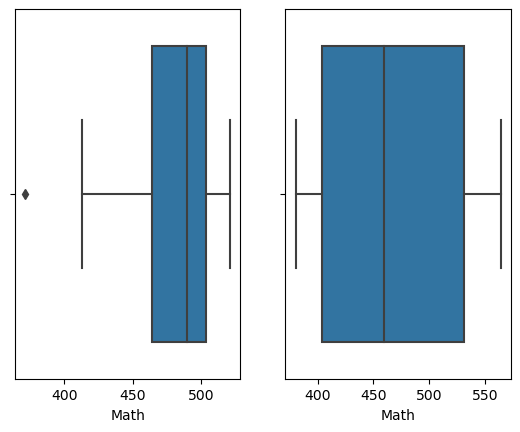

In [27]:
fig, ax = plt.subplots(1, 2)
sns.boxplot(x = pisa[pisa.Continent_Code == "EU"]["Math"], data = pisa, ax=ax[0])
sns.boxplot(x = pisa[pisa.Continent_Code == "AS"]["Math"], data = pisa, ax=ax[1]);